# **Import Library**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import itertools
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings("ignore")


#  **Load and Explore the Dataset**

In [ ]:
data = pd.read_csv("/content/heart.csv")



In [ ]:
# View first few rows
print(data.head(10))

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   
5   39   M           NAP        120          339          0     Normal    170   
6   45   F           ATA        130          237          0     Normal    170   
7   54   M           ATA        110          208          0     Normal    142   
8   37   M           ASY        140          207          0     Normal    130   
9   48   F           ATA        120          284          0     Normal    120   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1     

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


In [ ]:
print(data.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


In [ ]:
# Check for missing values
print("Missing Values per Column:\n", data.isnull().sum())

Missing Values per Column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [ ]:
# Check for unique values in categorical features
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for feature in categorical_features:
    print(f"Unique values in {feature}:", data[feature].unique())

Unique values in Sex: ['M' 'F']
Unique values in ChestPainType: ['ATA' 'NAP' 'ASY' 'TA']
Unique values in RestingECG: ['Normal' 'ST' 'LVH']
Unique values in ExerciseAngina: ['N' 'Y']
Unique values in ST_Slope: ['Up' 'Flat' 'Down']


#  **Exploratory Data Analysis (EDA)**

In [ ]:
# Check for missing values
print("Missing Values per Column:\n", data.isnull().sum())

Missing Values per Column:
 Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


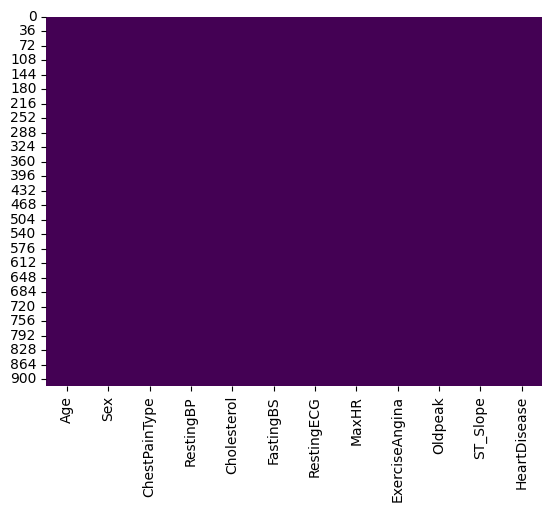

In [ ]:
sns.heatmap(data.isnull(), cbar=False, cmap="viridis") # Check the null values by heatmap diagram
plt.show()

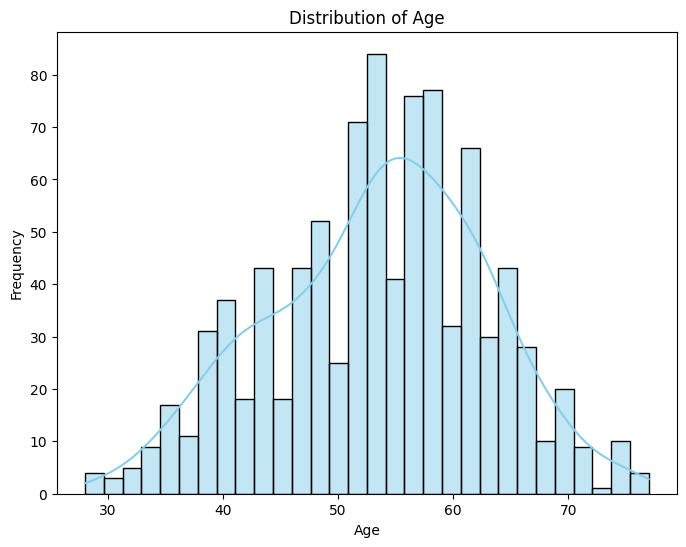

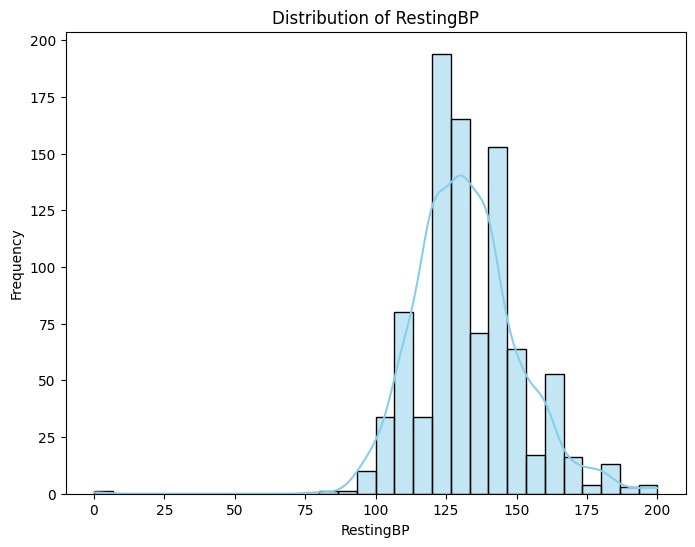

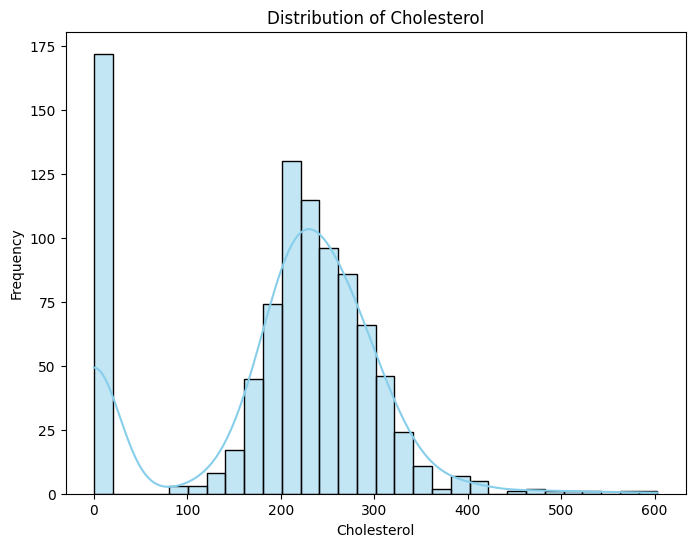

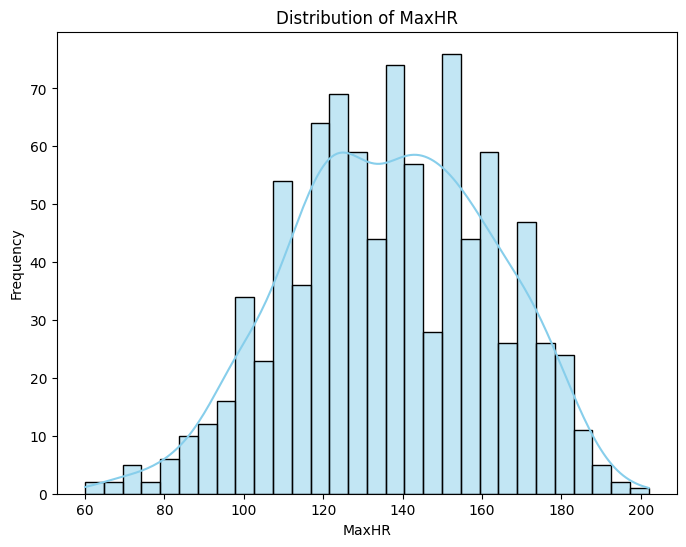

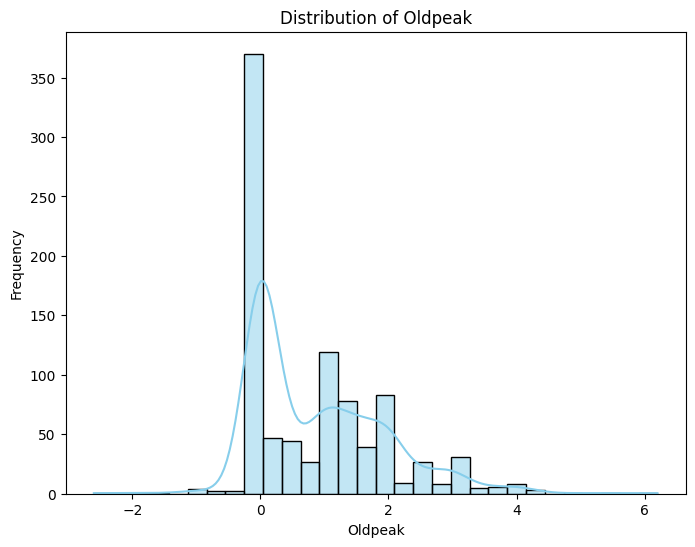

In [ ]:
# Numerical features
numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, bins=30, color="skyblue")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()


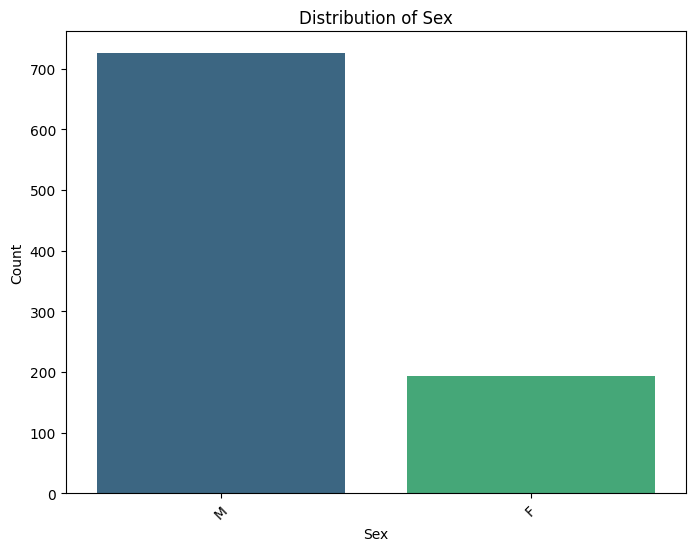

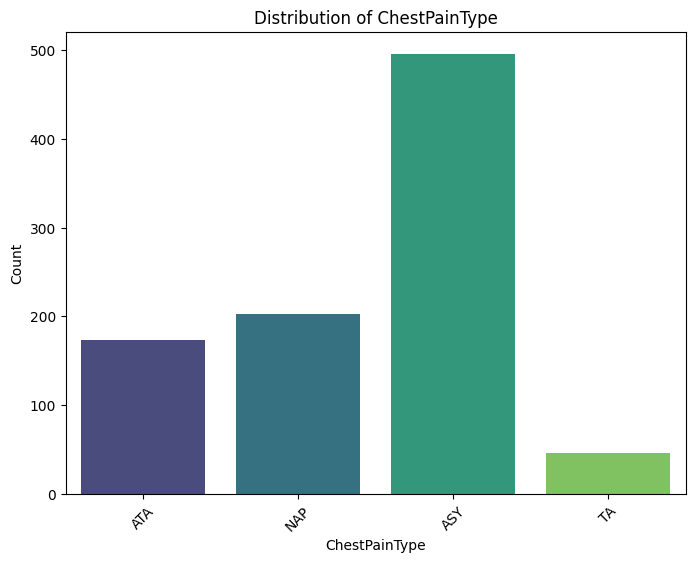

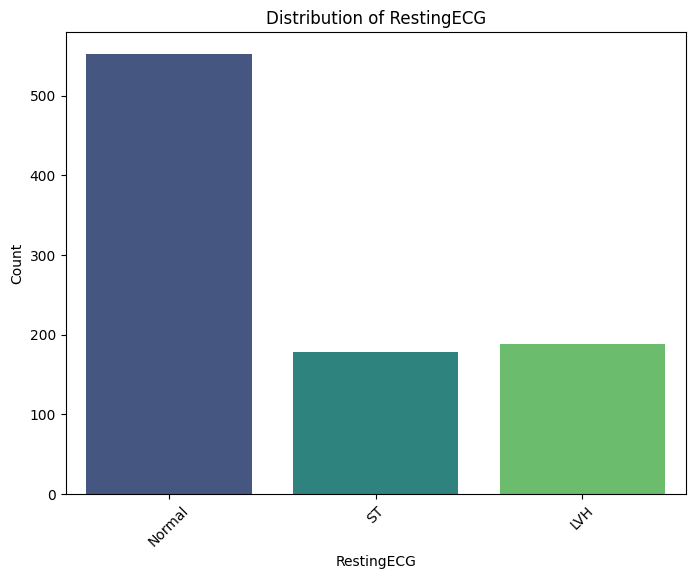

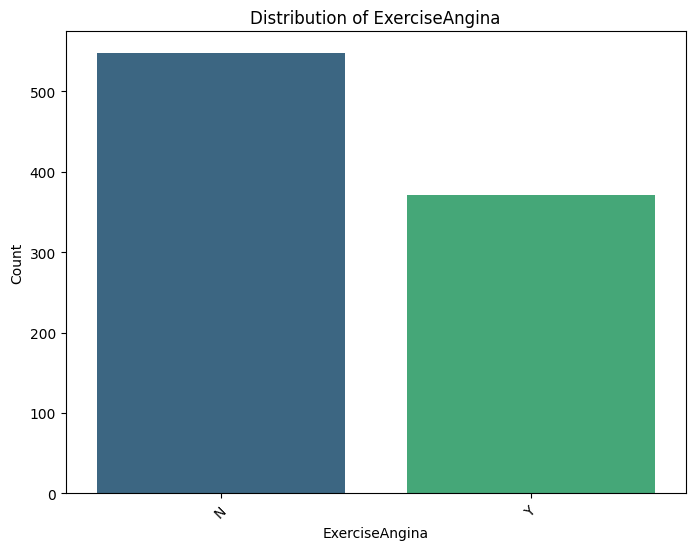

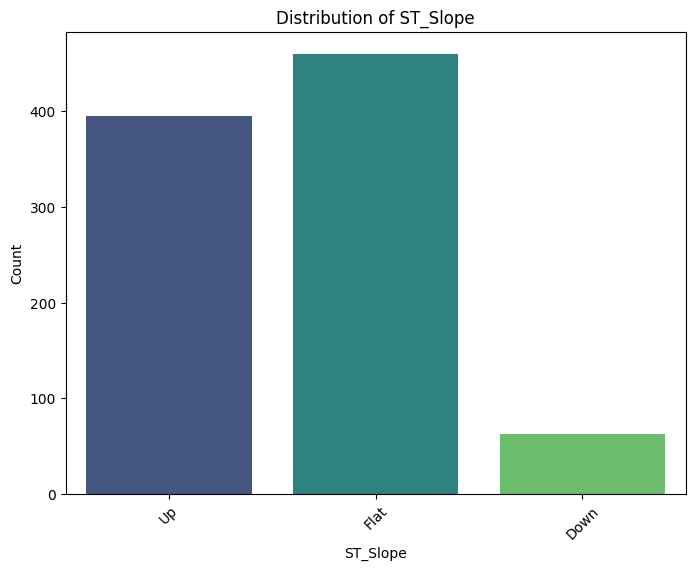

In [ ]:
# Categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data, x=feature, palette="viridis")
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


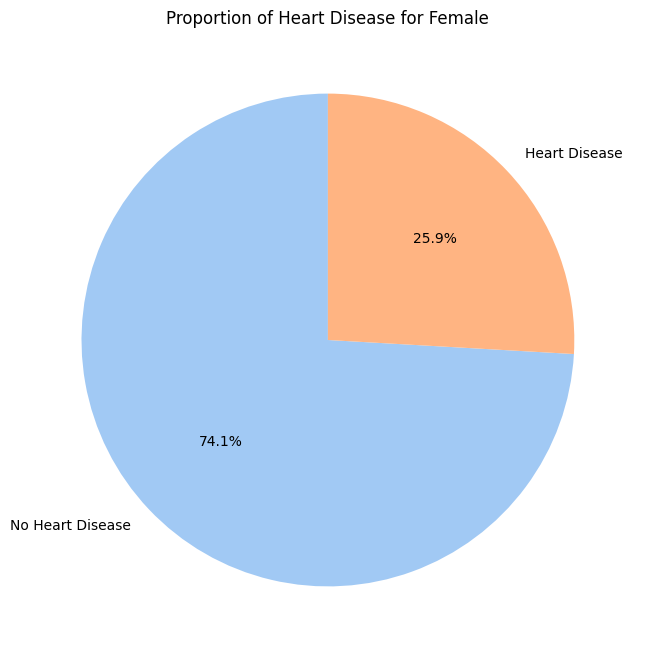

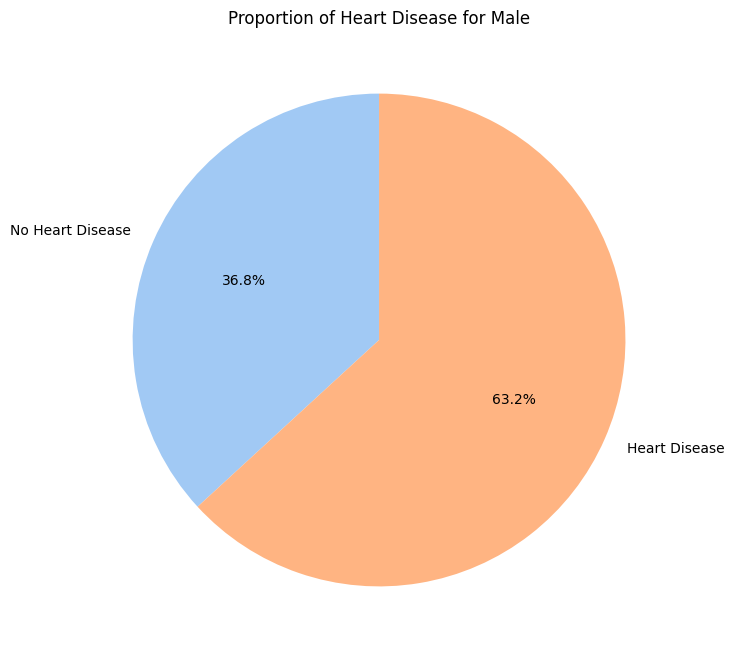

In [ ]:
# Group data by Sex and HeartDisease
grouped_data = data.groupby(['Sex', 'HeartDisease']).size().unstack()

# Plot pie charts for each sex
for sex in grouped_data.index:
    labels = ['No Heart Disease', 'Heart Disease']
    sizes = grouped_data.loc[sex]

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
    plt.title(f"Proportion of Heart Disease for {'Male' if sex == 'M' else 'Female'}")
    plt.show()


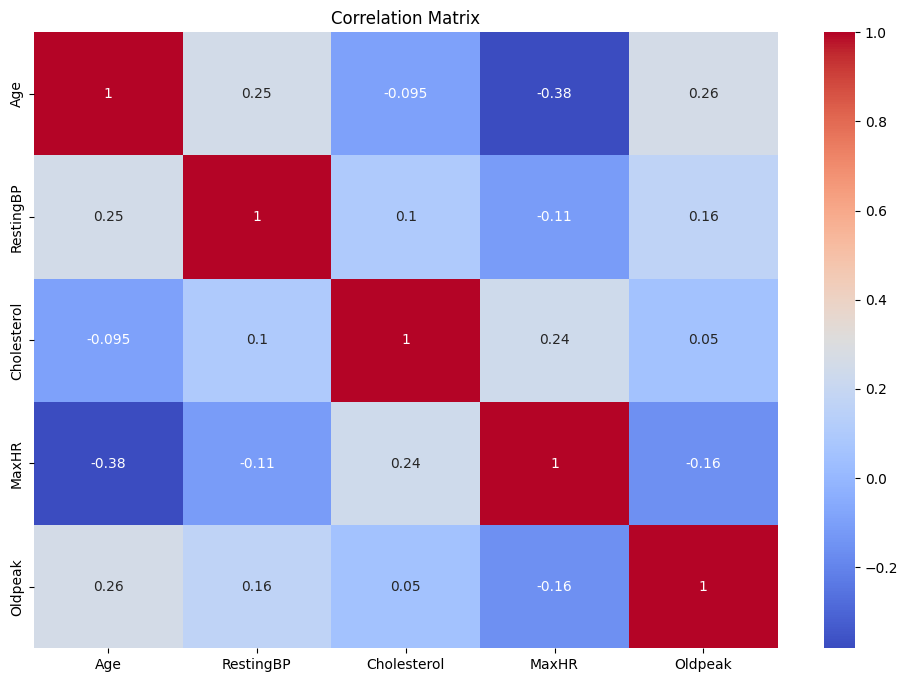

In [ ]:
# Heatmap for correlation between numerical variables
plt.figure(figsize=(12, 8))
# Calculate correlation only for numerical features
sns.heatmap(data[numerical_features].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

<Axes: >

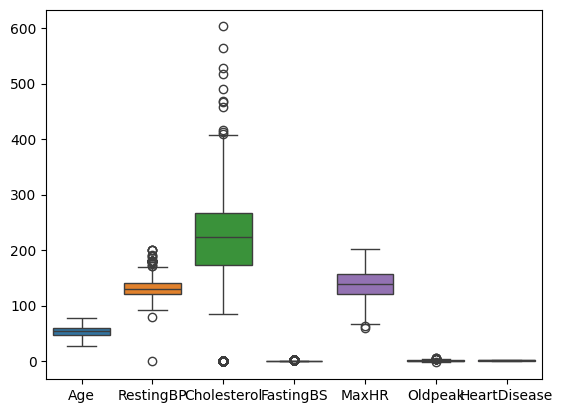

In [ ]:
sns.boxplot(data=data, x=None, y=None, hue=None, order=None, hue_order=None, orient=None, color=None, palette=None, saturation=0.75)

# **Data Preprocessing**

**One-Hot Encoding for Categorical Variables**

In [ ]:
# One-hot encoding for categorical features
data = pd.get_dummies(data, columns=categorical_features, drop_first=True)


**Future Scaling**

In [ ]:
# Separate features and target variable
X = data.drop(columns=['HeartDisease'])
y = data['HeartDisease']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Train Test Split**

In [ ]:
# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


**K-Fold Cross Validation**

In [ ]:
for model_name, model in models.items():
    # K-Fold Cross Validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

**Model Training & Evaluation**

In [ ]:
# Define machine learning models
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "ANN": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
}

# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"\n{model_name} - Accuracy: {accuracy*100:.2f}%")
    print(classification_report(y_test, y_pred))



KNN - Accuracy: 85.33%
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184


Naive Bayes - Accuracy: 85.87%
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184


Logistic Regression - Accuracy: 85.33%
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.8

In [ ]:
def plot_confusion_matrix(cm, classes, model_name, normalize=False, cmap=plt.cm.Blues):
    """
    Plots a confusion matrix heatmap.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt=".2f" if normalize else "d", cmap=cmap, cbar=False)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.xticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
    plt.yticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
    plt.show()

In [ ]:
def plot_roc_curve(y_test, y_pred_prob, model_name):
    """
    Plots the ROC curve.
    """
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.title(f"ROC Curve for {model_name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.show()


Evaluating KNN...
Accuracy: 85.33%


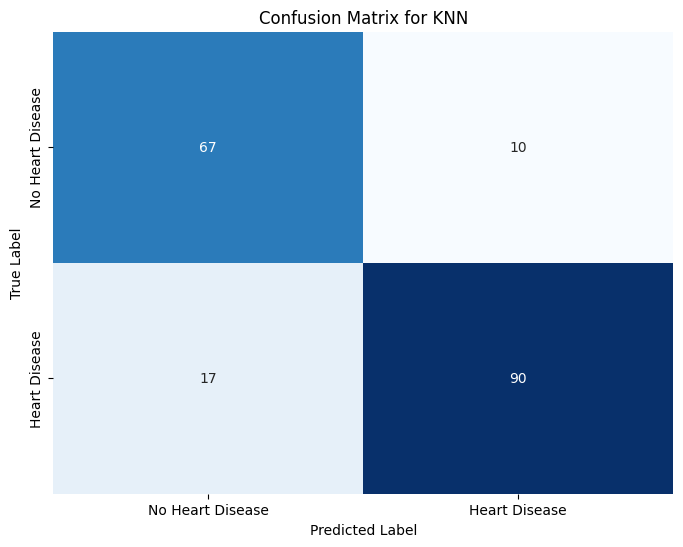


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



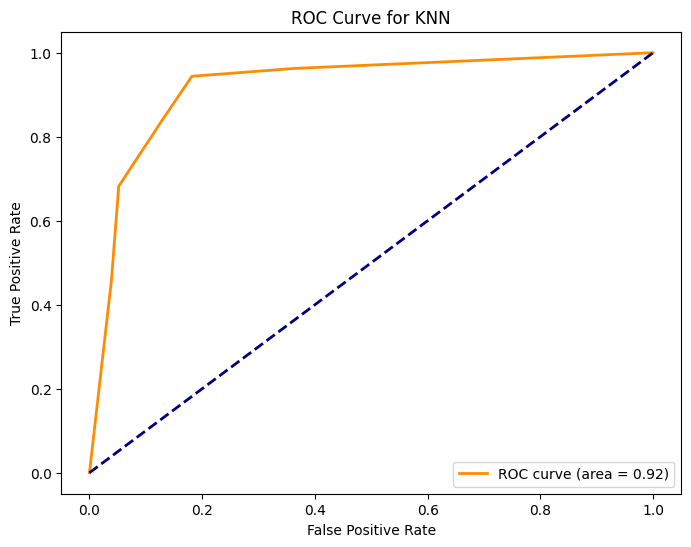


Evaluating Naive Bayes...
Accuracy: 85.87%


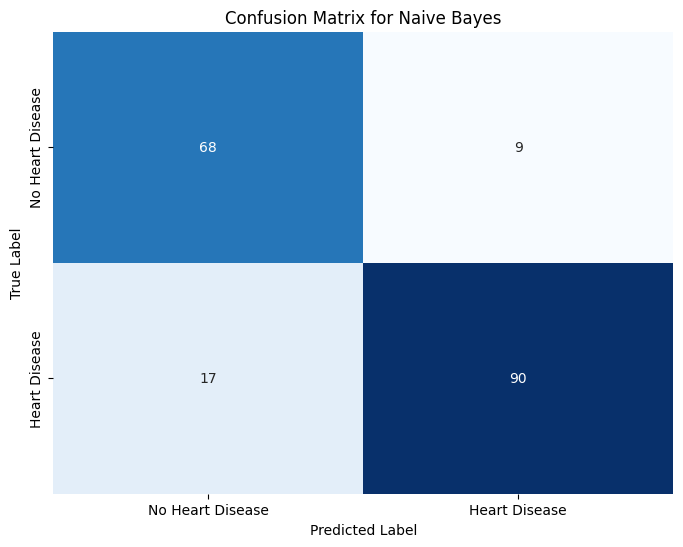


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84        77
           1       0.91      0.84      0.87       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



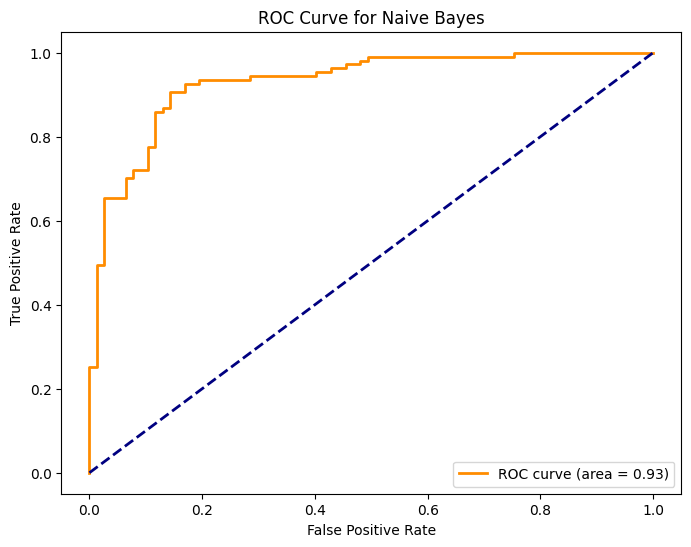


Evaluating Logistic Regression...
Accuracy: 85.33%


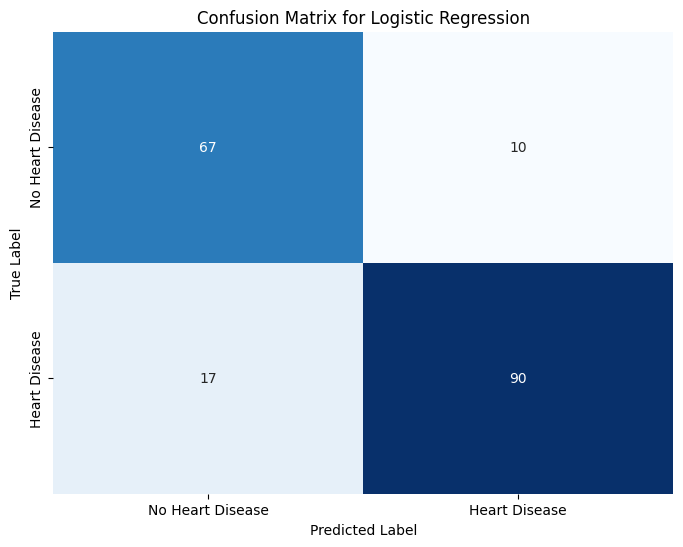


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



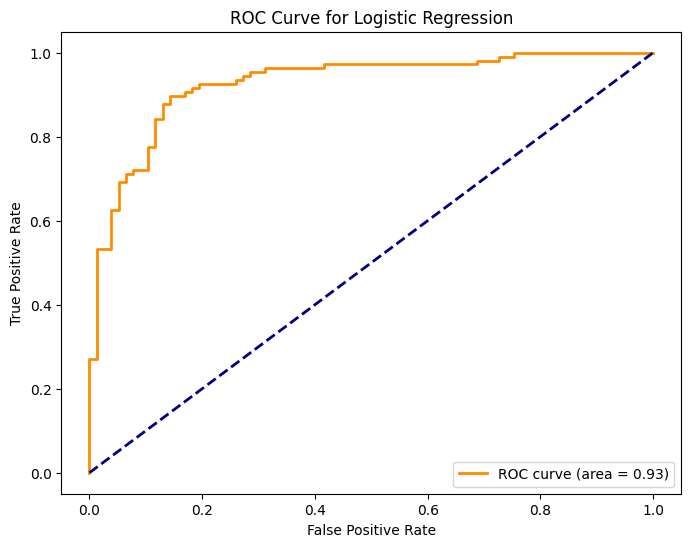


Evaluating Decision Tree...
Accuracy: 84.78%


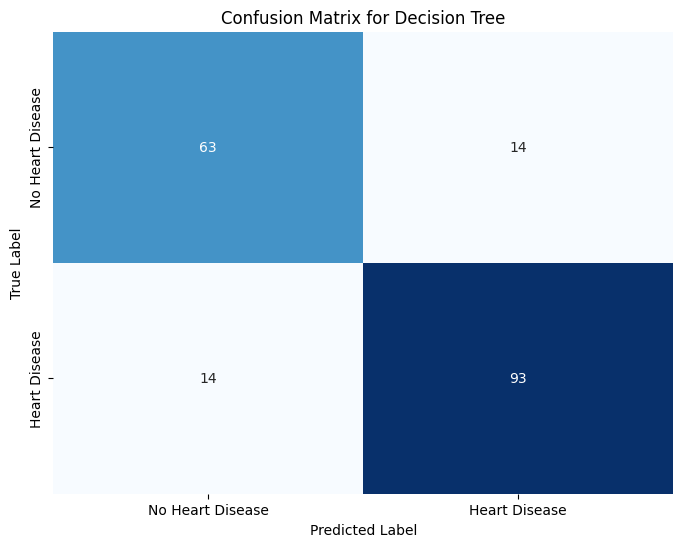


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        77
           1       0.87      0.87      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.85      0.85      0.85       184



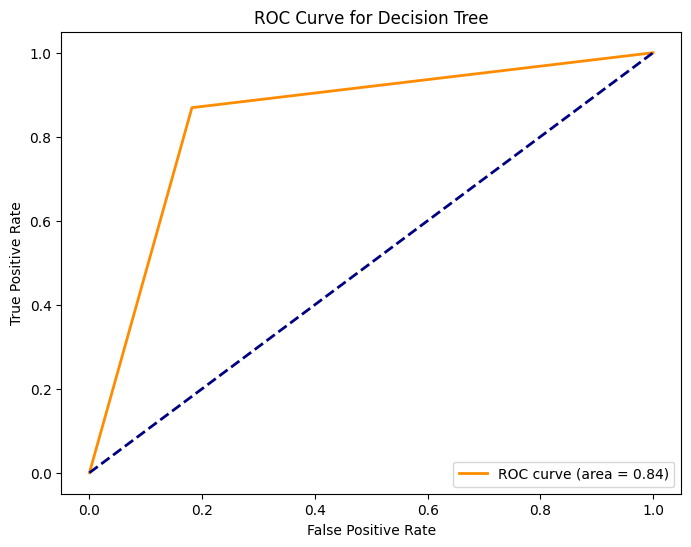


Evaluating Random Forest...
Accuracy: 86.96%


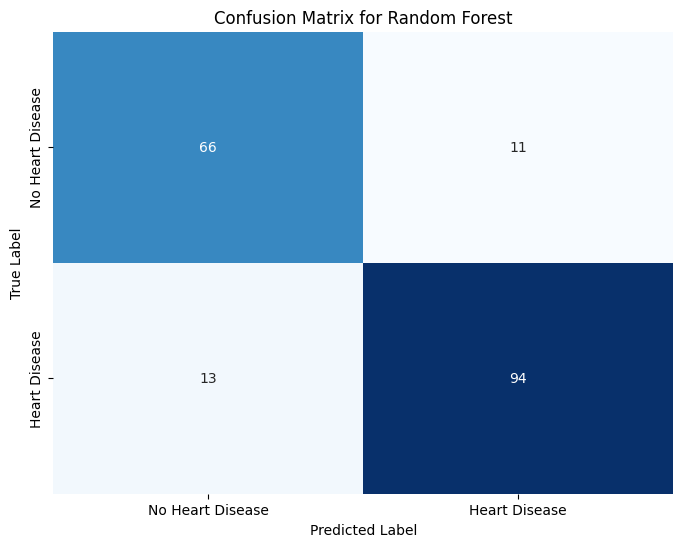


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.86      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.87       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.87      0.87       184



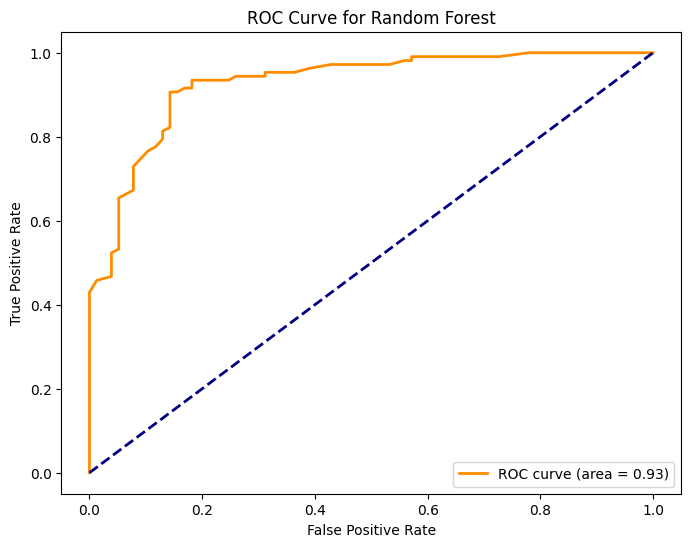


Evaluating SVM...
Accuracy: 87.50%


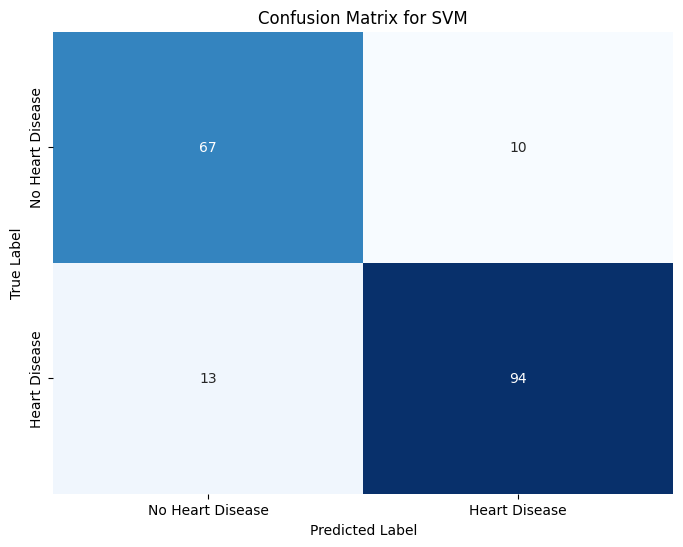


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



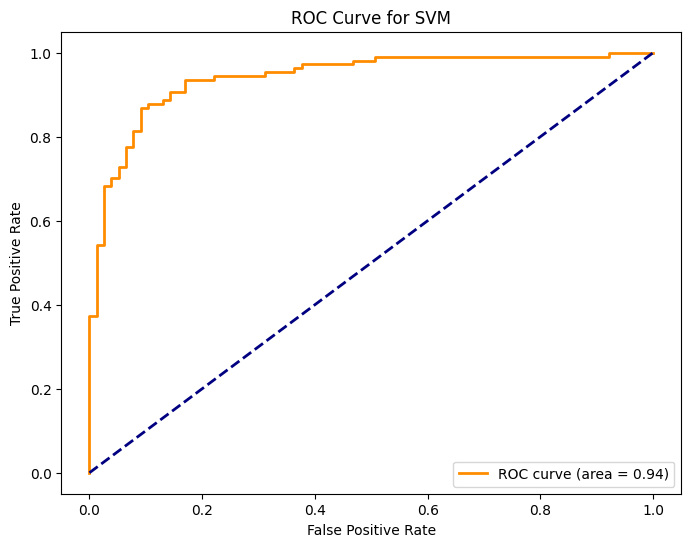


Evaluating ANN...
Accuracy: 88.04%


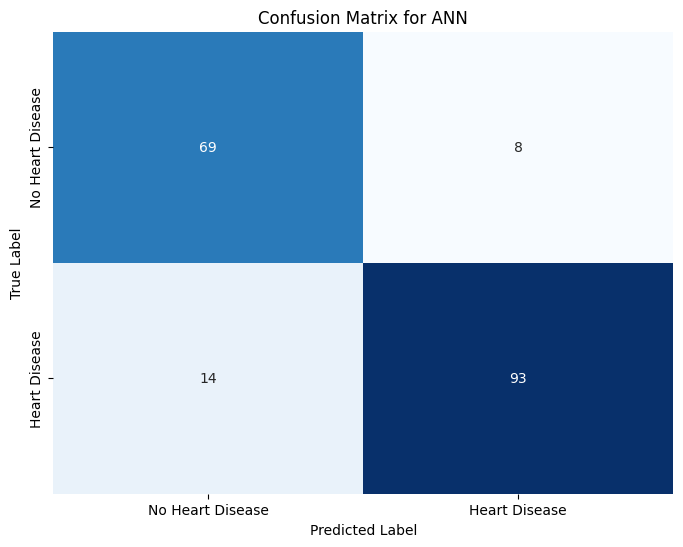


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        77
           1       0.92      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



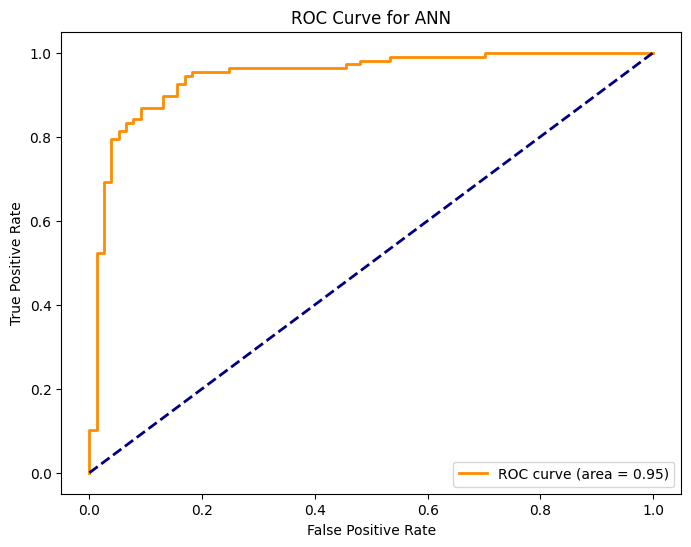

In [ ]:
# Train and evaluate each model
models = {
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "ANN": MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)
}

results = {}

# Loop through models
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f"Accuracy: {accuracy*100:.2f}%")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, classes=["No Heart Disease", "Heart Disease"], model_name=model_name)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # ROC Curve
    if y_pred_prob is not None:
        plot_roc_curve(y_test, y_pred_prob, model_name=model_name)

### **Visualize Model Performance**

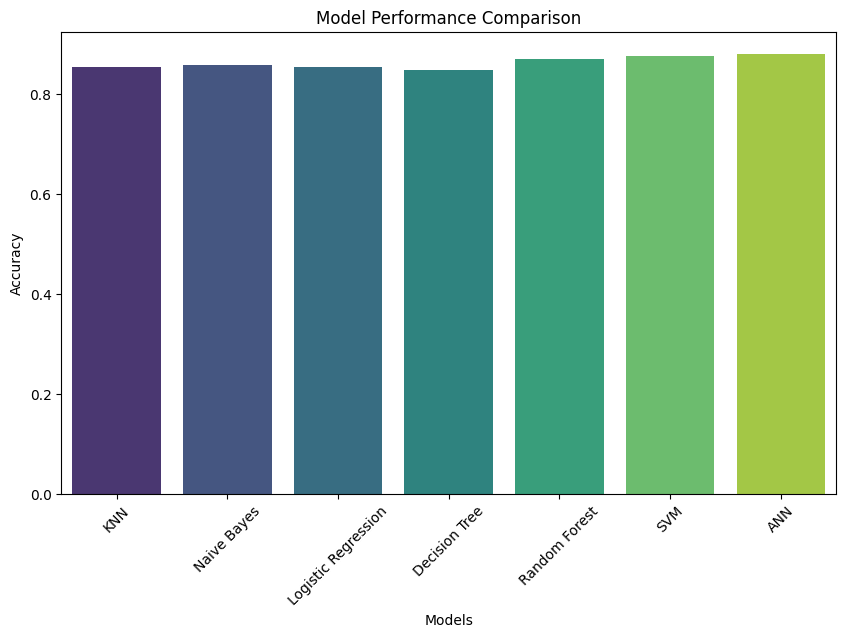

In [ ]:
model_names = list(results.keys())
accuracies = list(results.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Performance Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.xticks(rotation=45)
plt.show()


**Feature Importance (Random Forest)**

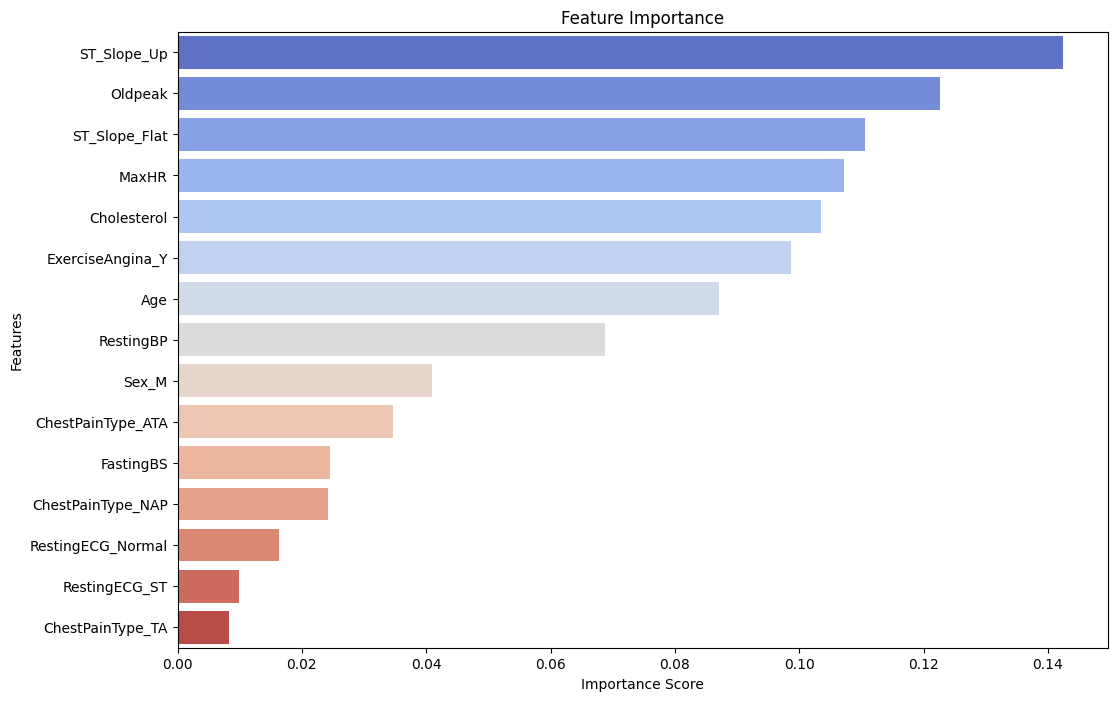

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
feature_importances = pd.Series(rf.feature_importances_, index=data.drop(columns=['HeartDisease']).columns).sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()


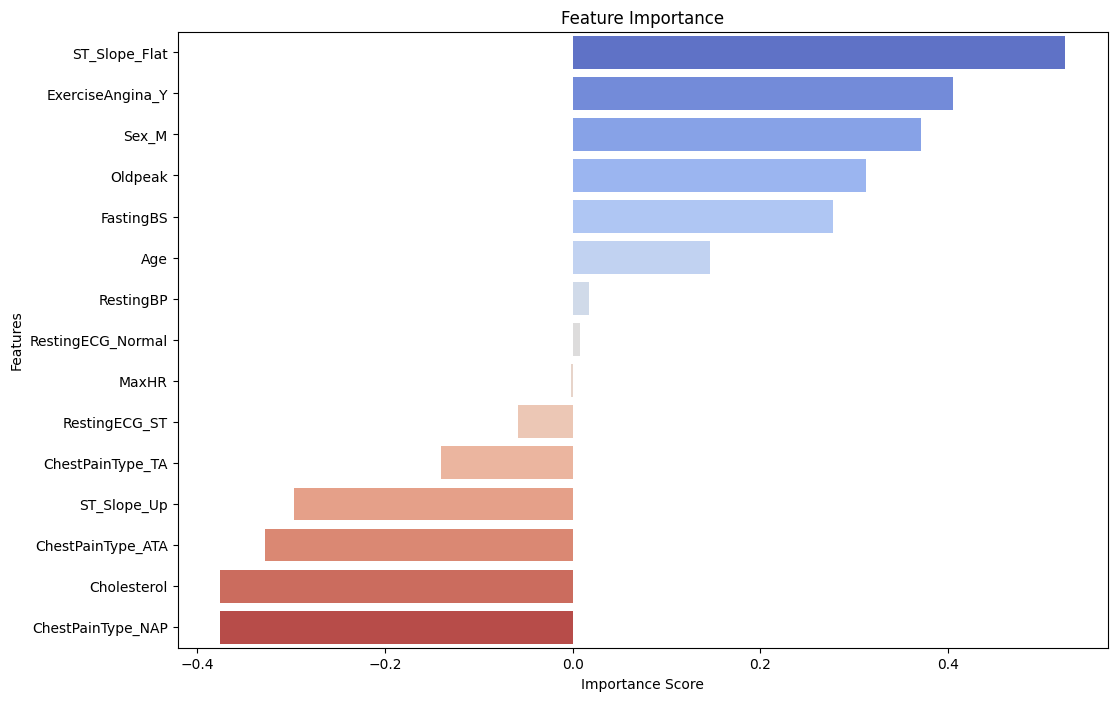

In [ ]:
from sklearn.svm import SVC  # Make sure SVC is imported

# ... other code ...

svm = SVC(kernel='linear')  # Specify a linear kernel
svm.fit(X_train, y_train)
# ... rest of the code ...
svm.fit(X_train, y_train)
# The line below is changed to use svm instead of svc
feature_importances = pd.Series(svm.coef_[0], index=data.drop(columns=['HeartDisease']).columns).sort_values(ascending=False)
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index, palette="coolwarm")
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

**ROC Curve for the best Model**

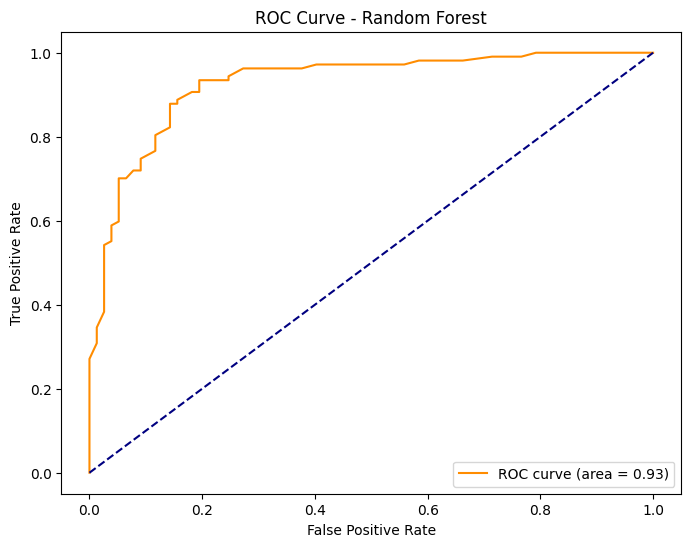

In [ ]:
# Example for Random Forest ROC Curve
y_pred_prob = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


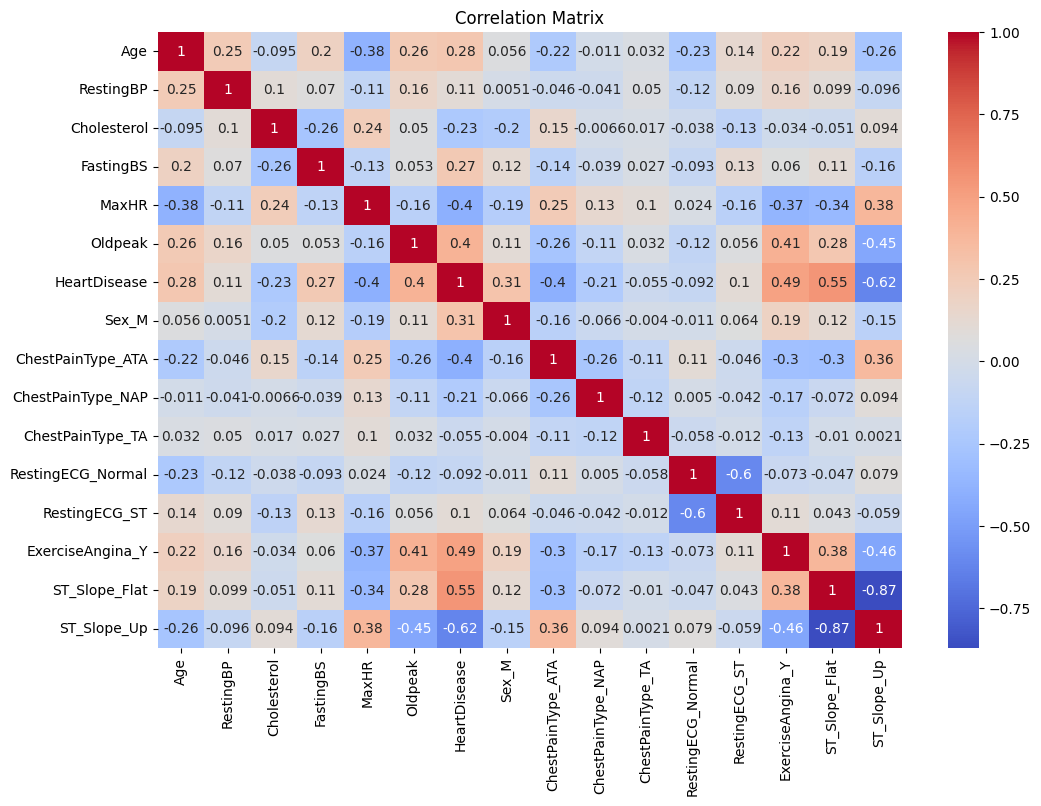

In [ ]:
# Heatmap for correlation between numerical variables
plt.figure(figsize=(12, 8))
# Calculate correlation only for numerical features
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()